# Import packages

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
sns.set_theme()

# Read the dataset

In [2]:
# fetch dataset 
cancer_data = fetch_ucirepo(id=17)
df = cancer_data.data.features
df['target'] = cancer_data.data.targets


C:\Users\hassa\AppData\Local\Temp\ipykernel_6624\329917111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = cancer_data.data.targets


In [3]:
# Check if it works
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
df.shape

(569, 31)

In [5]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'target'],
      dtype='object')

In [6]:
df.tail()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [7]:
df['target'] = df['target'].map({'M': 0, 'B' : 1})

C:\Users\hassa\AppData\Local\Temp\ipykernel_6624\708401458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map({'M': 0, 'B' : 1})


## No missing data

In [8]:
# Check for missing data
df.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
target                0
dtype: int64

In [9]:
df.tail()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


# Visualizing the dataset

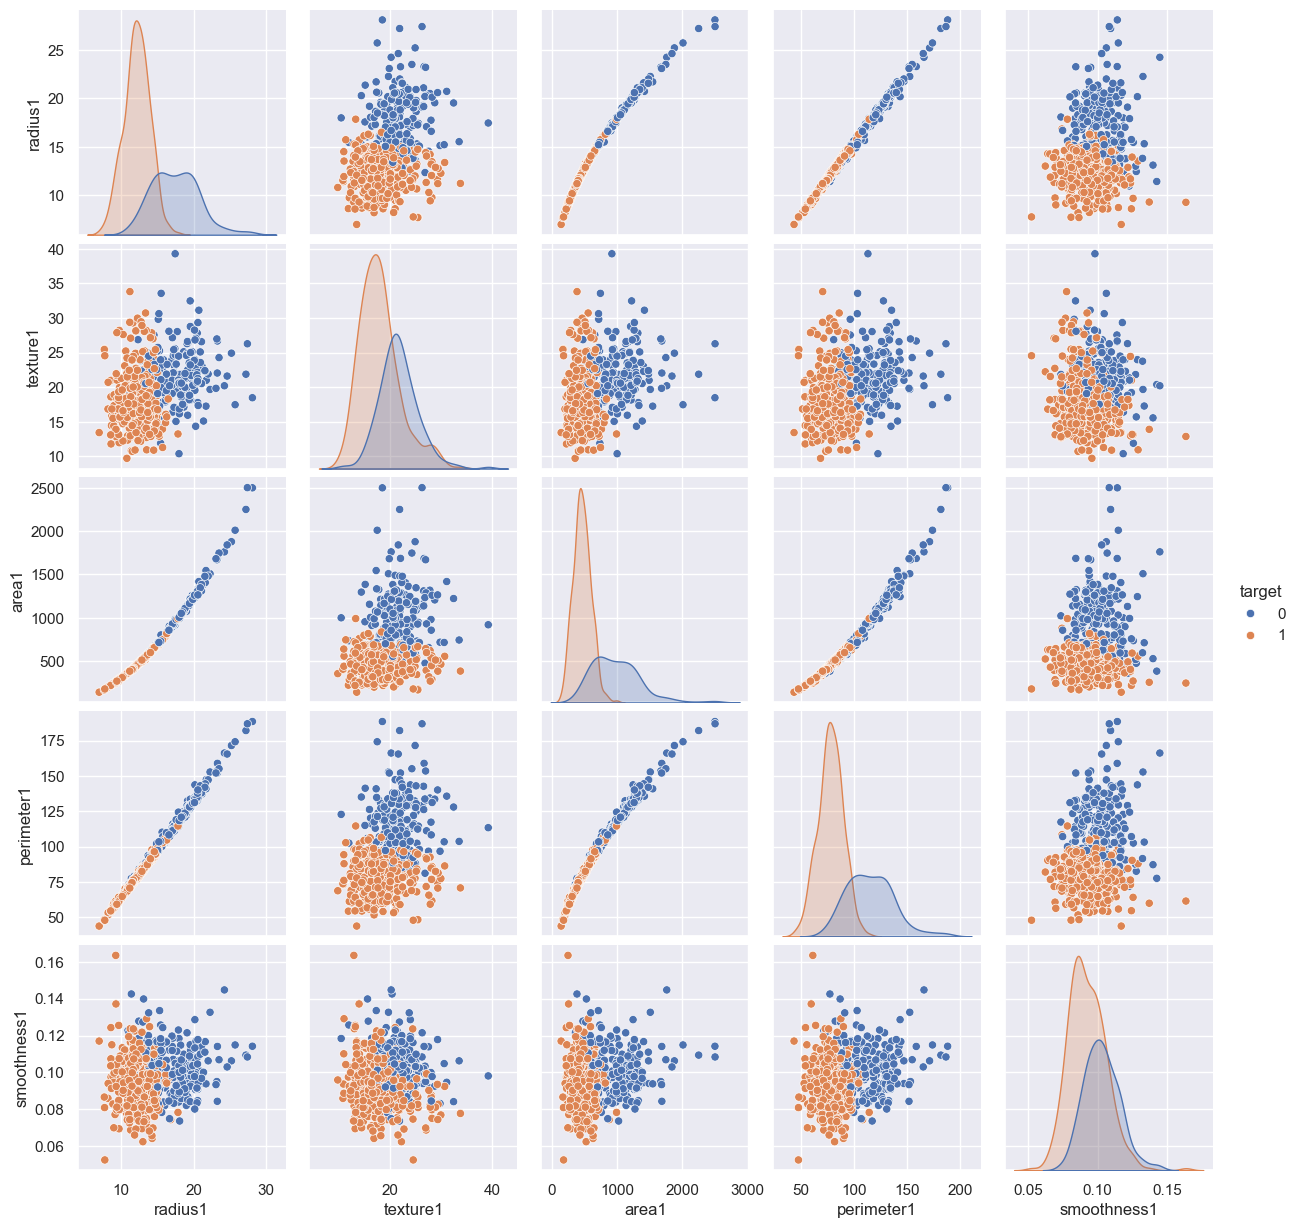

In [10]:
sns.pairplot(df, hue = 'target', vars = ['radius1', 'texture1', 'area1', 'perimeter1', 'smoothness1'])

<Axes: xlabel='target', ylabel='count'>

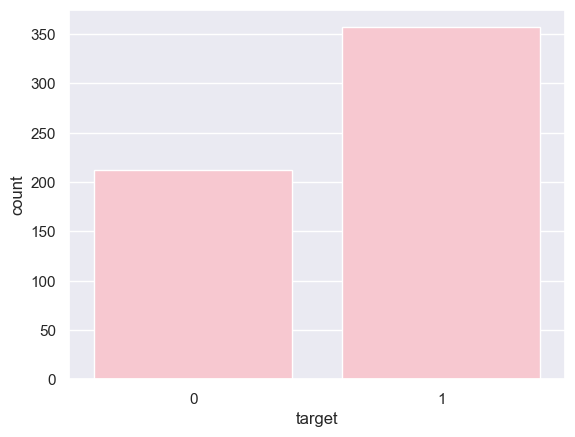

In [11]:
# How many targets cases we have

sns.countplot(data = df, x = 'target', color = 'pink')

Text(0.5, 1.0, 'area vs smoothness')

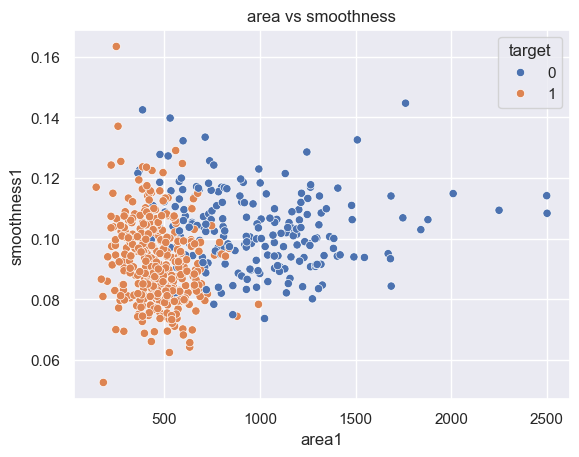

In [15]:
sns.scatterplot(data = df, x = 'area1', y = 'smoothness1', hue = 'target')
plt.title('area vs smoothness')

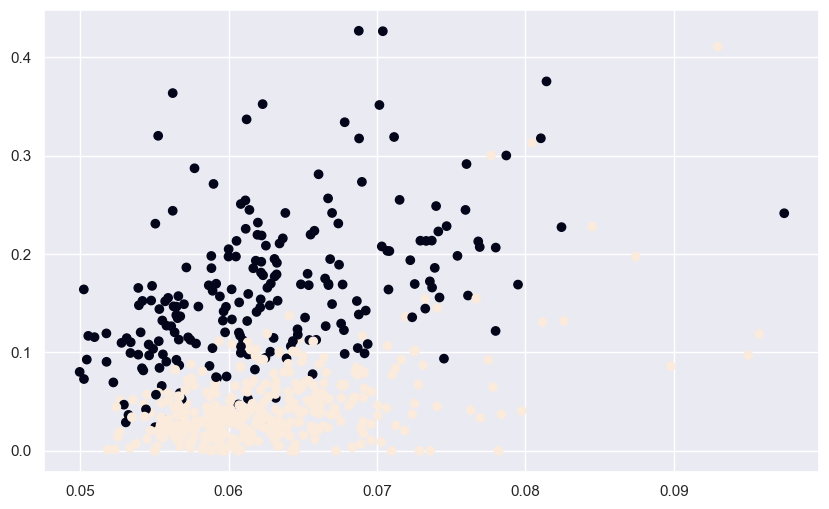

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(data = df, x = 'fractal_dimension1', y = 'concavity1', c = 'target')

<Axes: xlabel='fractal_dimension1', ylabel='concavity1'>

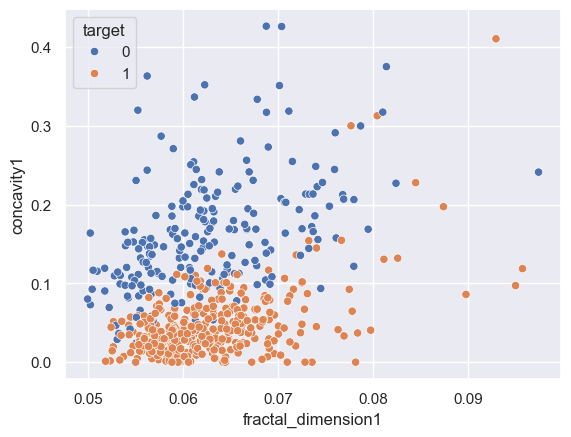

In [14]:
sns.scatterplot(data = df, x = 'fractal_dimension1', y = 'concavity1', hue = 'target')

[Text(0.5, 1.0, 'Correlation')]

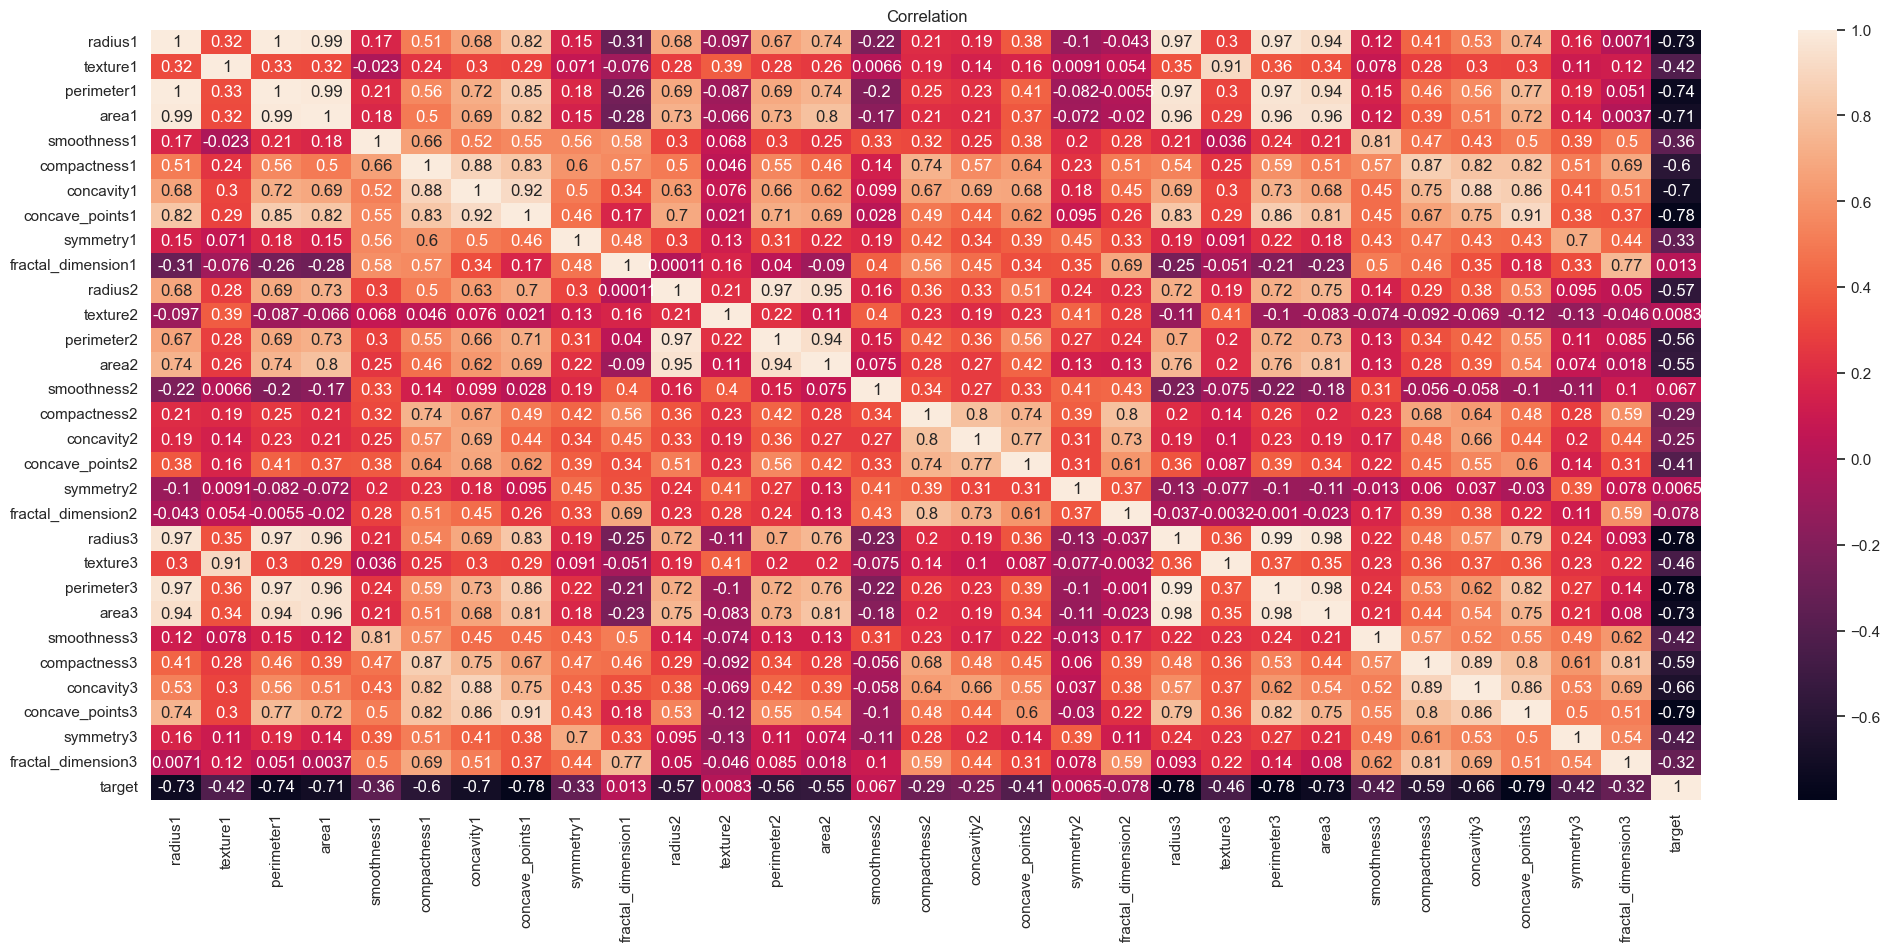

In [22]:
# Checking for the correlation

fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(data=df.corr(), annot=True)
ax.set(title = "Correlation")

# Step 4: Modeling training

In [23]:
X = df.drop(labels = 'target', axis = 1)
y = df['target']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [67]:
y_train.head()

394    1
334    1
341    1
148    1
377    1
Name: target, dtype: int64

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((369, 30), (200, 30), (369,), (200,))

In [69]:
# Assigning the model
svc_model = SVC()

In [70]:
svc_model.fit(X_train, y_train)

SVC()

# Step 5: Evaluating the model

In [71]:
predicted_y = svc_model.predict(X_test)

In [72]:
cm = confusion_matrix(y_pred= predicted_y, y_true=y_test)

<Axes: >

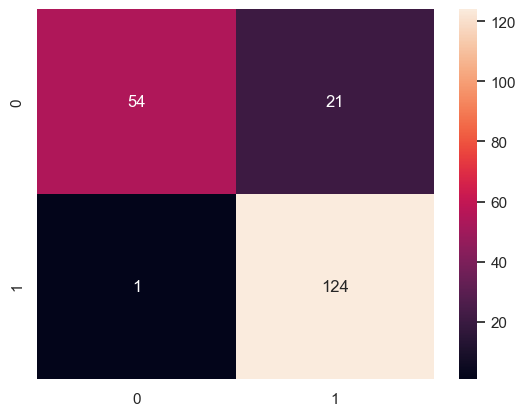

In [73]:
sns.heatmap(cm, annot=True, fmt = '.0f')

In [74]:
print(classification_report(y_true=y_test, y_pred=predicted_y))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83        75
           1       0.86      0.99      0.92       125

    accuracy                           0.89       200
   macro avg       0.92      0.86      0.87       200
weighted avg       0.90      0.89      0.89       200



# Improving the model

In [77]:
min_train = X_train.min()

In [78]:
range_train = (X_train - min_train).max() 

In [79]:
range_train

radius1                 18.749000
texture1                28.900000
perimeter1             130.410000
area1                 1866.500000
smoothness1              0.078210
compactness1             0.321960
concavity1               0.410800
concave_points1          0.191300
symmetry1                0.198000
fractal_dimension1       0.047480
radius2                  1.184500
texture2                 4.497900
perimeter2               9.276100
area2                  216.872000
smoothness2              0.020057
compactness2             0.132388
concavity2               0.396000
concave_points2          0.052790
symmetry2                0.068660
fractal_dimension2       0.028945
radius3                 25.200000
texture3                32.960000
perimeter3             178.890000
area3                 3246.800000
smoothness3              0.151430
compactness3             1.030710
concavity3               1.252000
concave_points3          0.290300
symmetry3                0.507200
fractal_dimens

In [80]:
X_train_scaled = (X_train - min_train)/range_train

In [81]:
X_train_scaled.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
394,0.273028,0.253979,0.262863,0.162175,0.493671,0.230277,0.116431,0.173863,0.442929,0.245366,...,0.223413,0.351942,0.211974,0.115283,0.475665,0.145540,0.128035,0.215846,0.292390,0.102436
334,0.283695,0.298962,0.261406,0.171926,0.240890,0.057709,0.018880,0.044616,0.241919,0.199874,...,0.215079,0.432646,0.190732,0.110601,0.336987,0.061346,0.028906,0.137203,0.194795,0.110710
341,0.140007,0.223529,0.136876,0.073399,0.262371,0.213815,0.205015,0.119812,0.492929,0.448399,...,0.111905,0.269114,0.116496,0.051866,0.344251,0.304945,0.346725,0.279711,0.279180,0.282619
148,0.397835,0.166090,0.384786,0.266059,0.452755,0.244316,0.206597,0.289179,0.335354,0.228517,...,0.314286,0.171420,0.325284,0.179161,0.399062,0.238874,0.247843,0.550810,0.221806,0.141966
377,0.345565,0.616955,0.322828,0.224270,0.139113,0.073984,0.030940,0.058390,0.182323,0.161542,...,0.268254,0.650182,0.261054,0.152581,0.261705,0.114882,0.063371,0.199139,0.222397,0.101123


<Axes: xlabel='area1', ylabel='smoothness1'>

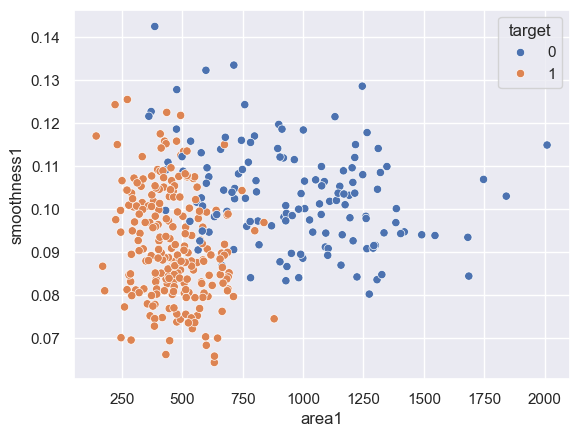

In [82]:
sns.scatterplot(x = X_train['area1'], y = X_train['smoothness1'], hue = y_train)

<Axes: xlabel='area1', ylabel='smoothness1'>

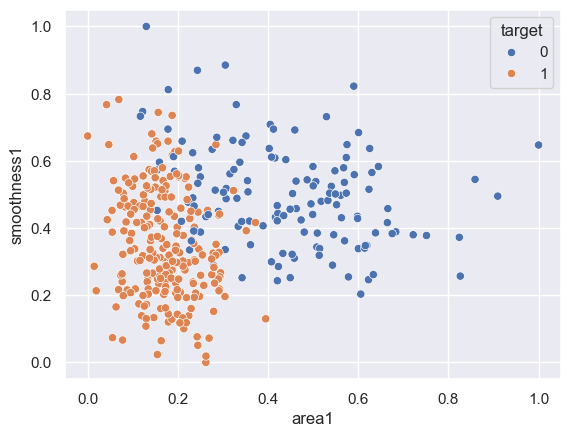

In [83]:
sns.scatterplot(x = X_train_scaled['area1'], y = X_train_scaled['smoothness1'], hue = y_train)

In [84]:
min_test = X_test.min()

In [85]:
range_test = (X_test - min_test).max()

In [86]:
X_test_scaled = (X_test - min_test)/range_test

<Axes: xlabel='area1', ylabel='smoothness1'>

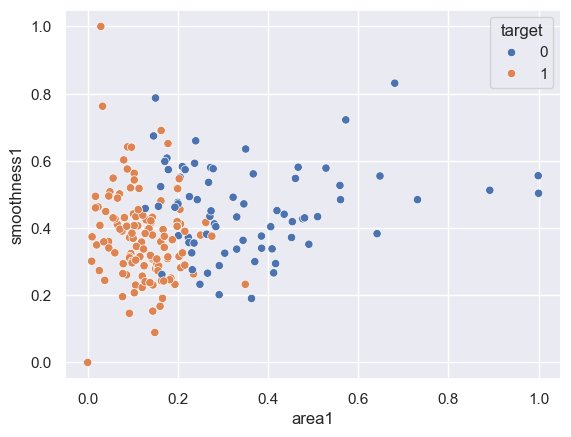

In [90]:
sns.scatterplot(x = X_test_scaled['area1'], y = X_test_scaled['smoothness1'], hue = y_test)

In [91]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

<Axes: >

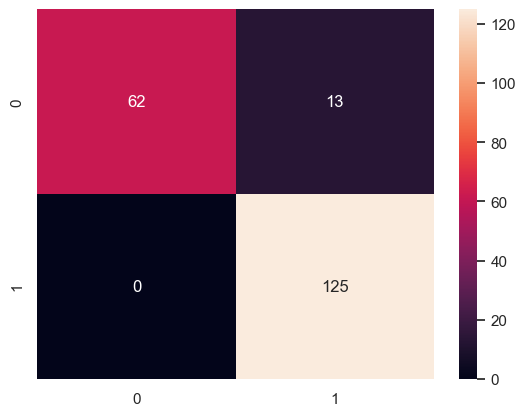

In [92]:
predicted_y = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred= predicted_y)

sns.heatmap(cm, annot = True, fmt = 'd')

In [93]:
print(classification_report(y_pred=predicted_y, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        75
           1       0.91      1.00      0.95       125

    accuracy                           0.94       200
   macro avg       0.95      0.91      0.93       200
weighted avg       0.94      0.94      0.93       200

